# Please double check for errors or misinterpretations ~Kailash

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import seaborn as sns

In [29]:
df1 = pd.read_pickle(r"C:\BigDataA3\dataframes\cleaned_data_All_Beauty.pkl")
df2 = pd.read_pickle(r"C:\BigDataA3\dataframes\cleaned_data_Amazon_Fashion.pkl")

temp_unified = pd.concat([df1, df2], axis=0)

In [30]:
temp_unified.head(1)

,rating,title_reviews,text,images_reviews,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,...,videos,store,categories,details,bought_together,subtitle,author,brand,review_length,year
0,5.0,Such a lovely scent but not overpowering.,This spray is really nice. It smells really go...,[],B00YQ6X8EO,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1588687728923,0,True,...,"{'title': ['Best Hair Product For Summer!', 'O...",HERBIVORE,[],"{""Hair Type"": ""Wavy"", ""Material Type Free"": ""D...",None,None,None,HERBIVORE,61,2020


# Star Rating

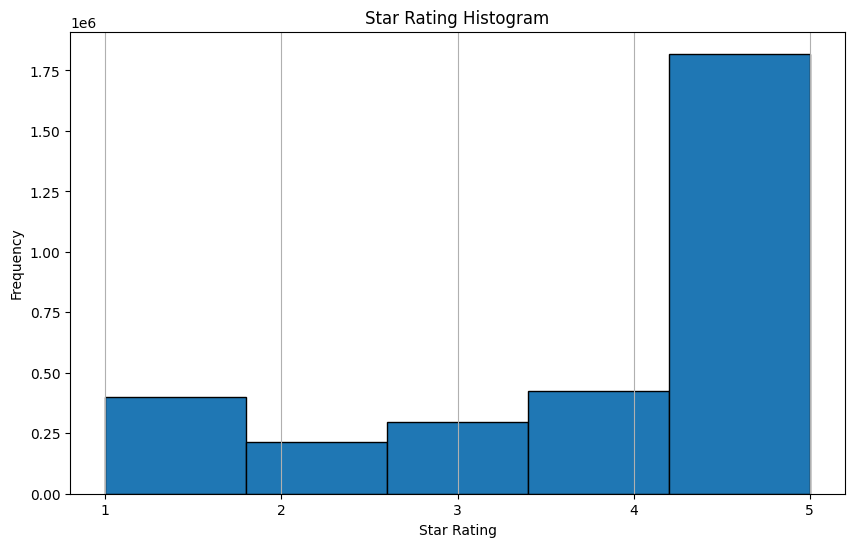

In [31]:

plt.figure(figsize=(10, 6))
temp_unified['rating'].hist(bins=5, edgecolor='black')
plt.title('Star Rating Histogram')
plt.xlabel('Star Rating')
plt.ylabel('Frequency')
plt.xticks(range(1, 6))
plt.grid(axis='y')
plt.show()

# Top 10 Categories

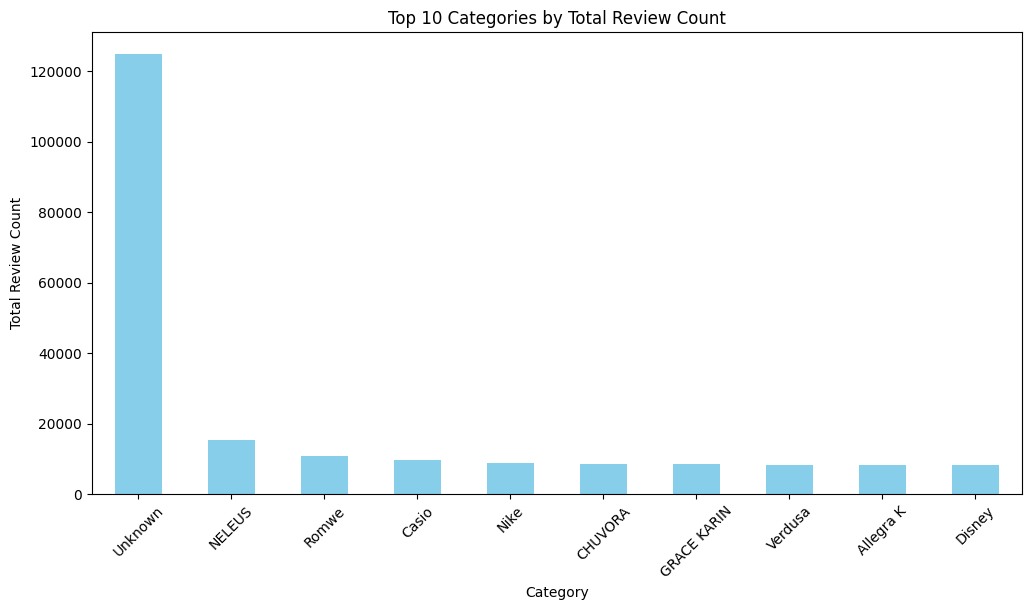

In [32]:
top_categories = temp_unified['brand'].value_counts().head(10)

plt.figure(figsize=(12, 6))
top_categories.plot(kind='bar', color='skyblue')
plt.title('Top 10 Categories by Total Review Count')
plt.xlabel('Category')
plt.ylabel('Total Review Count')
plt.xticks(rotation=45)
plt.show()

# Top 10 brands excluding Unknown

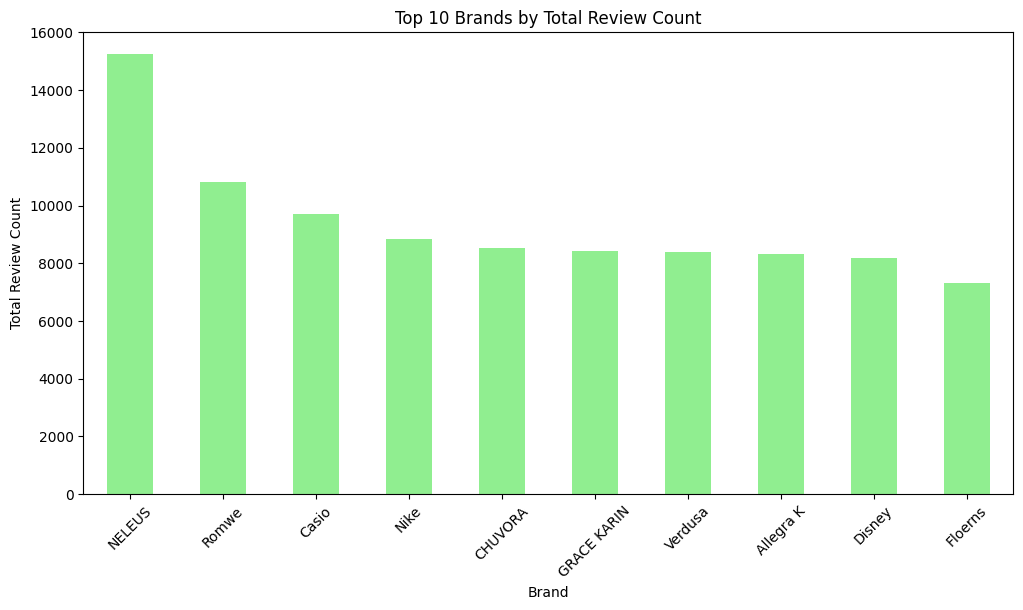

In [33]:
top_brands = temp_unified[temp_unified['brand'] != 'Unknown']['brand'].value_counts().head(10)

plt.figure(figsize=(12, 6))
top_brands.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Brands by Total Review Count')
plt.xlabel('Brand')
plt.ylabel('Total Review Count')
plt.xticks(rotation=45)
plt.show()

# Average rating per year

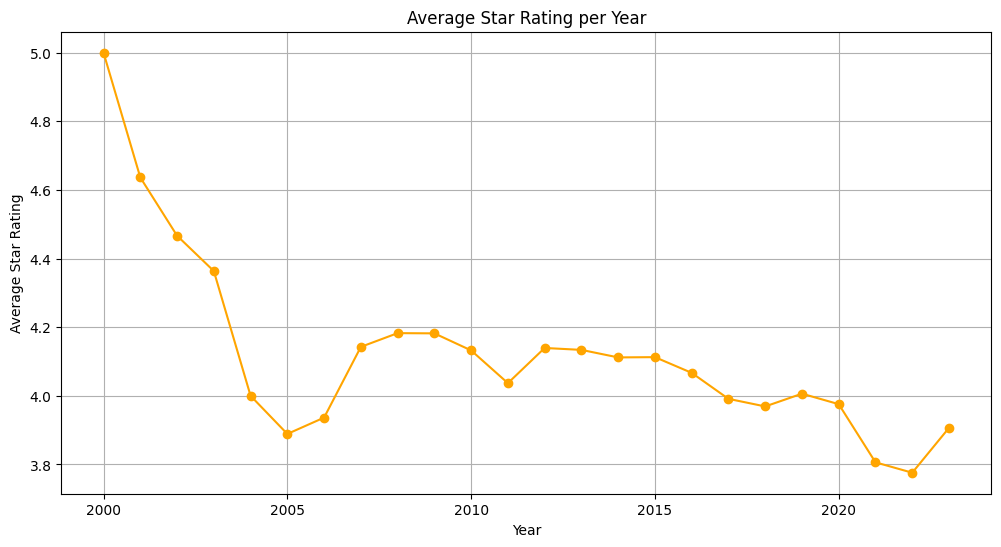

In [34]:

average_rating_per_year = temp_unified.groupby('year')['rating'].mean()

plt.figure(figsize=(12, 6))
average_rating_per_year.plot(kind='line', marker='o', color='orange')
plt.title('Average Star Rating per Year')
plt.xlabel('Year')
plt.ylabel('Average Star Rating')
plt.grid()
plt.show()

# Correlation

In [35]:
correlation = temp_unified['review_length'].corr(temp_unified['rating'])
print(f'Pearson correlation between review length and star rating: {correlation:.2f}')

Pearson correlation between review length and star rating: -0.05


# Distribution of helpful vote counts

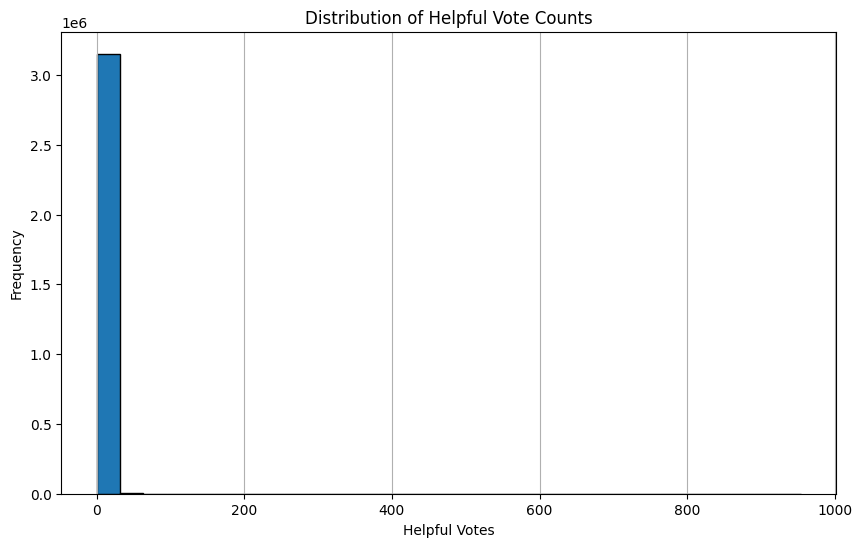

In [36]:
plt.figure(figsize=(10, 6))
temp_unified['helpful_vote'].hist(bins=30, edgecolor='black')
plt.title('Distribution of Helpful Vote Counts')
plt.xlabel('Helpful Votes')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

# Relationship between verified purchase and star rating

C:\Users\kaila\AppData\Local\Temp\ipykernel_11172\1775942050.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='verified_purchase', y='rating', data=temp_unified, palette='Set2')


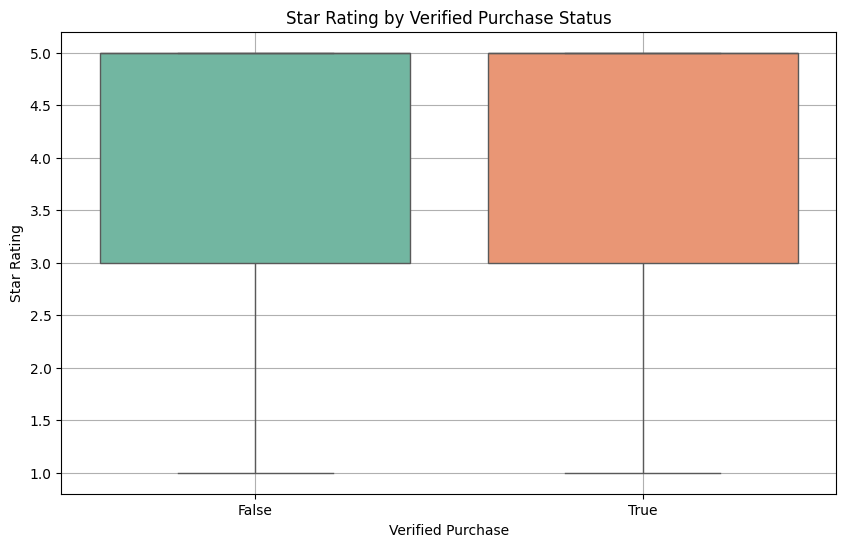

In [37]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='verified_purchase', y='rating', data=temp_unified, palette='Set2')
plt.title('Star Rating by Verified Purchase Status')
plt.xlabel('Verified Purchase')
plt.ylabel('Star Rating')
plt.grid()
plt.show()